In [1]:
import sys
sys.path.append("..")

In [2]:
from utils import DataGenerator, read_annotation_lines
from models import Yolov4
from config import yolo_config
import tensorflow as tf

In [3]:
print(yolo_config['img_size'][0])
print(yolo_config['img_size'][1])

416
416


In [4]:
train_lines, val_lines = read_annotation_lines('../dataset/train_annotations/butelka.txt', test_size=0.1)
FOLDER_PATH = '../dataset/train_images/'
class_name_path = '../class_names/butelka_classes.txt'
data_gen_train = DataGenerator(train_lines, class_name_path, FOLDER_PATH)
data_gen_val = DataGenerator(val_lines, class_name_path, FOLDER_PATH)


model = Yolov4(class_name_path=class_name_path,
               config=yolo_config)


Yolov4
(416, 416, 3)
Build model


2021-11-29 18:34:08.671783: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-29 18:34:08.851567: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-29 18:34:08.852564: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-29 18:34:08.856024: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-29 18:34:08.856856: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 416, 416, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 416, 416, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 416, 416, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

__________________________________________________________________________________________________
tf.math.softplus_22 (TFOpLambda (None, 52, 52, 128)  0           batch_normalization_24[0][0]     
__________________________________________________________________________________________________
tf.math.tanh_22 (TFOpLambda)    (None, 52, 52, 128)  0           tf.math.softplus_22[0][0]        
__________________________________________________________________________________________________
tf.math.multiply_22 (TFOpLambda (None, 52, 52, 128)  0           batch_normalization_24[0][0]     
                                                                 tf.math.tanh_22[0][0]            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 52, 52, 128)  147456      tf.math.multiply_22[0][0]        
__________________________________________________________________________________________________
batch_norm

nms iou: 0.413 score: 0.3


In [5]:
model.load_model('wagi_loss_9')

nms iou: 0.413 score: 0.3


In [6]:
model.fit(data_gen_train, 
          initial_epoch=0,
          epochs=5, 
          val_data_gen=data_gen_val)

2021-11-29 18:34:52.364994: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2021-11-29 18:35:09.692389: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


675/675 [==============================] - 486s 685ms/step - loss: 1221.8898 - val_loss: 34.9085
Epoch 2/5
675/675 [==============================] - 458s 679ms/step - loss: 25.8816 - val_loss: nan
Epoch 3/5
675/675 [==============================] - 459s 680ms/step - loss: nan - val_loss: nan
Epoch 4/5
675/675 [==============================] - 465s 689ms/step - loss: nan - val_loss: nan
Epoch 5/5
675/675 [==============================] - 460s 682ms/step - loss: nan - val_loss: nan


In [7]:
model.save_model('wagi')

2021-11-29 18:08:55.590816: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: wagi/assets


/usr/local/lib/python3.8/dist-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
model.load_model('wagi')

In [6]:
min_loss = 10000

class SaveCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("loss")
        if(min_loss > current):
            min_loss = current
            model.save_model(f'siec_{epoch}')

In [ ]:
my_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='nasze.{epoch:02d}-{val_loss:.2f}.h5'),
]


model.fit(data_gen_train, 
          initial_epoch=0,
          epochs=10000, 
          val_data_gen=data_gen_val,
          callbacks=[my_callbacks])

img shape:  (384, 216, 3)
# of bboxes: 3


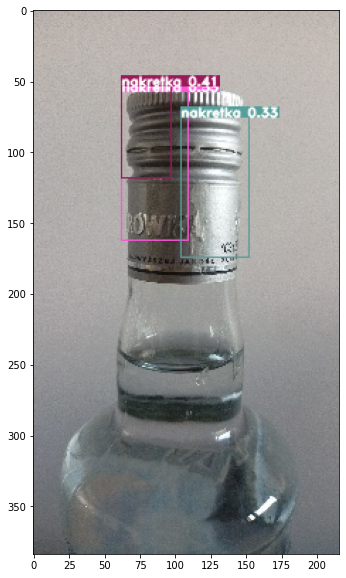

img shape:  (384, 216, 3)
# of bboxes: 1


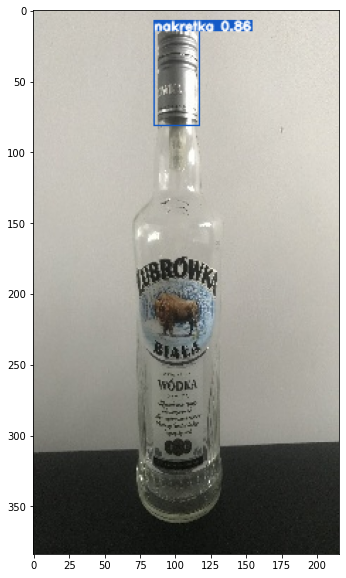

img shape:  (384, 216, 3)
# of bboxes: 1


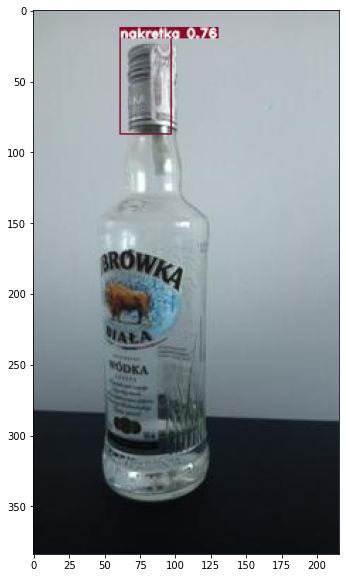

img shape:  (384, 216, 3)
# of bboxes: 1


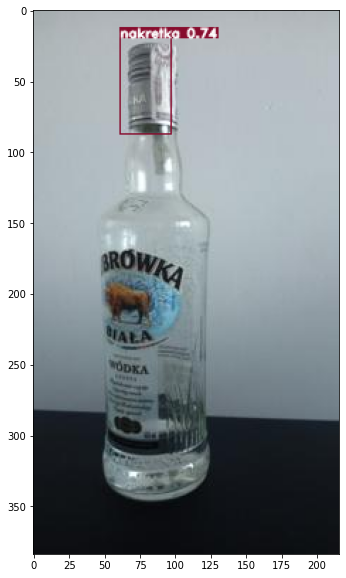

img shape:  (384, 216, 3)
# of bboxes: 1


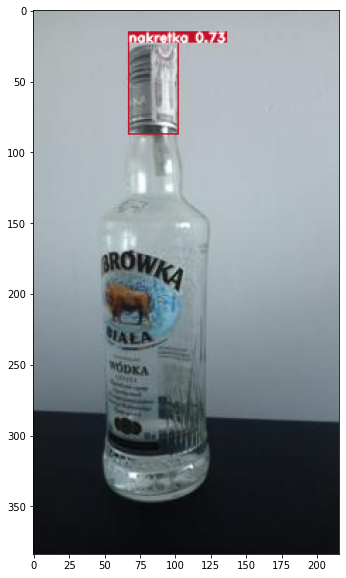

img shape:  (384, 216, 3)
# of bboxes: 1


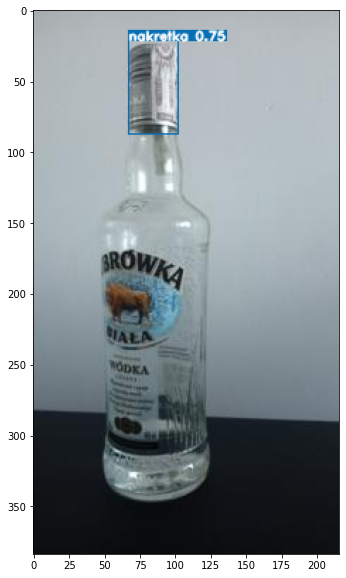

,x1,y1,x2,y2,class_name,score,w,h
0,67,21,102,87,nakretka,0.75422,35,66


In [8]:
model.predict('../dataset/valid_images/IMG20211109133402_BURST000.jpg', random_color=True)
model.predict('../dataset/valid_images/IMG_2178.JPG', random_color=True)
model.predict('../dataset/valid_images/IMG20211101141134_01.jpg', random_color=True)
model.predict('../dataset/valid_images/IMG20211101141134_00.jpg', random_color=True)
model.predict('../dataset/valid_images/IMG20211101141134_02.jpg', random_color=True)
model.predict('../dataset/valid_images/IMG20211101141134_03.jpg', random_color=True)
model.predict('../dataset/valid_images/IMG_8034.JPG', random_color=True)

In [10]:
model.save_model('moje_wagi_3')

INFO:tensorflow:Assets written to: moje_wagi_3/assets


/usr/local/lib/python3.8/dist-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
